In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
final = pd.read_excel(r'C:\Users\Yashita\Desktop\Dump\DOT2023.xlsx')

final.head()

,Name,Email,Mobile,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Specialization,Submitted Applications
0,Kishore,kis****************@gmail.com,9841******,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia/90_RV/API,Untouched,Unverified,Visual Arts,Specialization Not Available,0
1,Surya prakash,sur***********@gmail.com,8807******,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia/90/API,Closed,Verified,Interior Design,Specialization Not Available,0
2,Jeeshriya,ksh********@gmail.com,7550******,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia/90/API,Next Year,Verified,Fashion Design,Specialization Not Available,0
3,Nishanthi Priya Gangadharan,gan*****************@gmail.com,9360******,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia/90_RV/API,Closed,Unverified,Visual Arts,Specialization Not Available,0
4,Janani MA,jan***********@gmail.com,6380******,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia/90_RV/API,Closed,Unverified,Interior and Furniture Design,Specialization Not Available,0


In [3]:
final.drop(columns=['Name', 'Email', 'Mobile'] ,axis=1 ,  inplace=True)

In [4]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Specialization,Submitted Applications
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia/90_RV/API,Untouched,Unverified,Visual Arts,Specialization Not Available,0
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia/90/API,Closed,Verified,Interior Design,Specialization Not Available,0
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia/90/API,Next Year,Verified,Fashion Design,Specialization Not Available,0
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia/90_RV/API,Closed,Unverified,Visual Arts,Specialization Not Available,0
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia/90_RV/API,Closed,Unverified,Interior and Furniture Design,Specialization Not Available,0


In [5]:
final.isnull().sum()

Lead Origin               0
Country                   0
State                     0
City                      0
Instance                  0
Instance Date             0
Campaign                  0
Lead Stage                0
Lead Status               0
Course                    0
Specialization            0
Submitted Applications    0
dtype: int64

In [6]:
final.shape

(3289, 12)

In [7]:
final['Specialization'].value_counts()

Specialization Not Available    3289
Name: Specialization, dtype: int64

In [8]:
final.drop(columns=['Specialization'], inplace=True)

In [9]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Submitted Applications
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia/90_RV/API,Untouched,Unverified,Visual Arts,0
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia/90/API,Closed,Verified,Interior Design,0
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia/90/API,Next Year,Verified,Fashion Design,0
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia/90_RV/API,Closed,Unverified,Visual Arts,0
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia/90_RV/API,Closed,Unverified,Interior and Furniture Design,0


In [10]:
final['Lead Origin'].value_counts()

API        3225
Offline      48
Online       16
Name: Lead Origin, dtype: int64

In [11]:
final["Instance Date"] = pd.to_datetime(final["Instance Date"])
# final["Instance Date"] = pd.to_datetime(final["Instance Date"])

In [12]:
split_columns = final["Campaign"].str.split("/", expand=True)

In [13]:
split_columns

,0,1,2
0,collegedunia,90_RV,API
1,Collegedunia,90,API
2,Collegedunia,90,API
3,collegedunia,90_RV,API
4,collegedunia,90_RV,API
...,...,...,...
3284,RD2022,COLLEGEDUNIA,LAST YEAR
3285,RD2022,COLLEGEDUNIA,LAST YEAR
3286,RD2022,COLLEGEDUNIA,LAST YEAR
3287,RD2022,COLLEGEDUNIA,LAST YEAR


In [14]:
split_columns.value_counts()

0             1             2        
collegedunia  86            API          1390
Collegedunia  81            API          1314
collegedunia  2             API           201
              27            API            94
              81_RV         API            72
              86_RV         API            68
RD2022        COLLEGEDUNIA  LAST YEAR      48
Collegedunia  90            API            38
collegedunia  90_RV         API            30
Collegedunia  Emailer       Online          9
collegedunia  91_RV         API             8
              15            API             5
Collegedunia  SMS           Online          3
collegedunia  91            API             3
Collegedunia  MTextLink     Online          2
collegedunia  90_EI         API             1
              GenEmailer    NA              1
              GenEmailerD1  online          1
              test          API             1
dtype: int64

In [15]:
final["Campaign"] = split_columns[0]
final["Campaign Number"] = split_columns[1]
final["Source"] = split_columns[2]

In [16]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Submitted Applications,Campaign Number,Source
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia,Untouched,Unverified,Visual Arts,0,90_RV,API
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia,Closed,Verified,Interior Design,0,90,API
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia,Next Year,Verified,Fashion Design,0,90,API
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia,Closed,Unverified,Visual Arts,0,90_RV,API
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia,Closed,Unverified,Interior and Furniture Design,0,90_RV,API


In [17]:
final["month"] = final["Instance Date"].dt.month_name()
final["weekday"] = final["Instance Date"].dt.day_name()

In [18]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Submitted Applications,Campaign Number,Source,month,weekday
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia,Untouched,Unverified,Visual Arts,0,90_RV,API,September,Tuesday
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia,Closed,Verified,Interior Design,0,90,API,August,Thursday
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia,Next Year,Verified,Fashion Design,0,90,API,August,Tuesday
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia,Closed,Unverified,Visual Arts,0,90_RV,API,August,Thursday
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia,Closed,Unverified,Interior and Furniture Design,0,90_RV,API,August,Wednesday


### Leads Generated v/s Month 

In [19]:
final['month'].value_counts()

May          587
January      569
February     518
April        513
March        474
June         313
July         137
December     125
October       48
August         4
September      1
Name: month, dtype: int64

Text(0, 0.5, 'Counts')

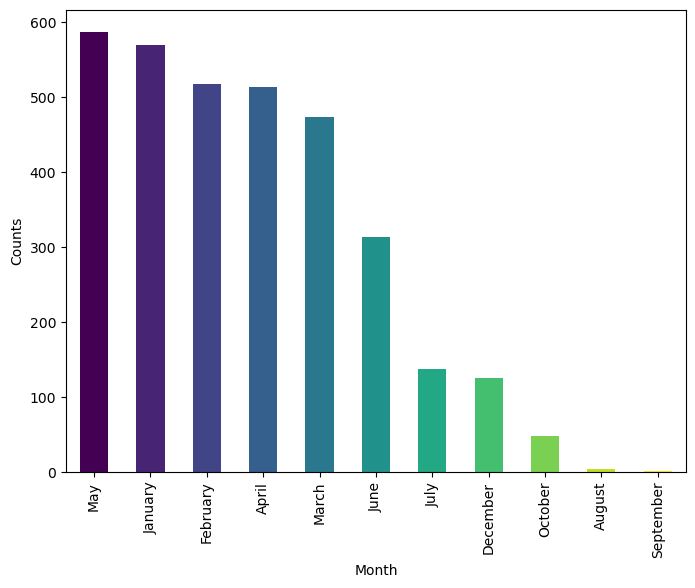

In [20]:
month_counts = final['month'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(month_counts)))
month_counts.plot(kind='bar', color=colors, figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Counts')

### Applications vs State

In [21]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Submitted Applications,Campaign Number,Source,month,weekday
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia,Untouched,Unverified,Visual Arts,0,90_RV,API,September,Tuesday
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia,Closed,Verified,Interior Design,0,90,API,August,Thursday
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia,Next Year,Verified,Fashion Design,0,90,API,August,Tuesday
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia,Closed,Unverified,Visual Arts,0,90_RV,API,August,Thursday
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia,Closed,Unverified,Interior and Furniture Design,0,90_RV,API,August,Wednesday


<Axes: >

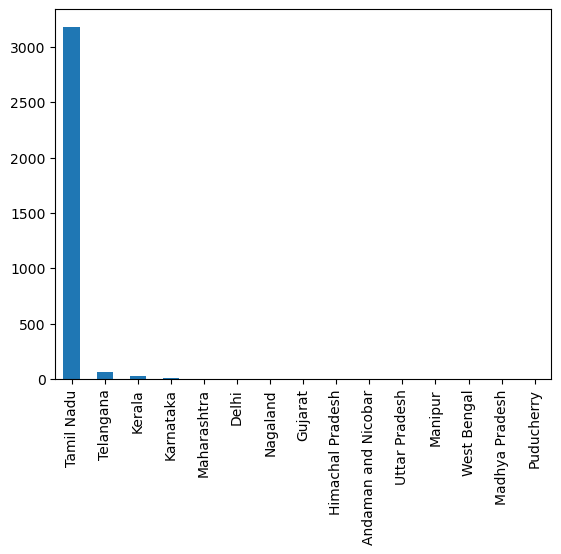

In [22]:
final["State"].value_counts().plot(kind='bar')

In [23]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Submitted Applications,Campaign Number,Source,month,weekday
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia,Untouched,Unverified,Visual Arts,0,90_RV,API,September,Tuesday
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia,Closed,Verified,Interior Design,0,90,API,August,Thursday
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia,Next Year,Verified,Fashion Design,0,90,API,August,Tuesday
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia,Closed,Unverified,Visual Arts,0,90_RV,API,August,Thursday
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia,Closed,Unverified,Interior and Furniture Design,0,90_RV,API,August,Wednesday


In [24]:
final['State'].value_counts()

Tamil Nadu             3178
Telangana                62
Kerala                   27
Karnataka                 6
Maharashtra               4
Delhi                     3
Nagaland                  1
Gujarat                   1
Himachal Pradesh          1
Andaman and Nicobar       1
Uttar Pradesh             1
Manipur                   1
West Bengal               1
Madhya Pradesh            1
Puducherry                1
Name: State, dtype: int64

In [25]:
arr=[]
for index,row in final.iterrows():
    if row['State']=='Tamil Nadu':
        arr.append(row['City'])

In [26]:
arr

['Chennai',
 'Chennai',
 'Chennai',
 'Chennai',
 'Chennai',
 'Vellore',
 'Theni',
 'Coimbatore',
 'Madurai',
 'Karaikudi',
 'Chennai',
 'Chennai',
 'Madurai',
 'Chennai',
 'Dharapuram',
 'Chennai',
 'Villupuram',
 'Chennai',
 'Chennai',
 'Salem',
 'Ariyalur',
 'Vellore',
 'Pattukkottai',
 'Chennai',
 'Chennai',
 'Chennai',
 'Chennai',
 'Nagercoil',
 'Tiruchirappalli',
 'Chennai',
 'Thoothukudi',
 'Cuddalore',
 'Salem',
 'Madurai',
 'Hosur',
 'Chennai',
 'Kallakurichi',
 'Cuddalore',
 'Vellore',
 'Tirunelveli',
 'Chennai',
 'Chennai',
 'Nagapattinam',
 'Vellore',
 'Mayiladuthurai',
 'Coimbatore',
 'Erode',
 'Theni',
 'Salem',
 'Krishnagiri',
 'Chennai',
 'Chennai',
 'Tenkasi',
 'Chennai',
 'Coimbatore',
 'Tiruchirappalli',
 'Chennai',
 'Chennai',
 'Vandavasi',
 'Chennai',
 'Chennai',
 'Vellore',
 'Tiruchirappalli',
 'Krishnagiri',
 'Chennai',
 'Chennai',
 'Coimbatore',
 'Kanchipuram',
 'Tenkasi',
 'Chennai',
 'Dindigul',
 'Chennai',
 'Chennai',
 'Chennai',
 'Chennai',
 'Chennai',
 'Siva

### Tamil Nadu Leads Analysis(City)

In [27]:
frequency = pd.Series(arr).value_counts()

In [28]:
frequency

Chennai       1742
Coimbatore     250
Madurai        138
Salem           96
Tiruppur        73
              ... 
Ilayangudi       1
Katpadi          1
Kotagiri         1
Kariapatti       1
Vedaranyam       1
Length: 87, dtype: int64

In [29]:
frequency_final=frequency[frequency>50]

In [30]:
frequency_final

Chennai            1742
Coimbatore          250
Madurai             138
Salem                96
Tiruppur             73
Erode                67
Tiruchirappalli      53
Vellore              51
dtype: int64

<Axes: >

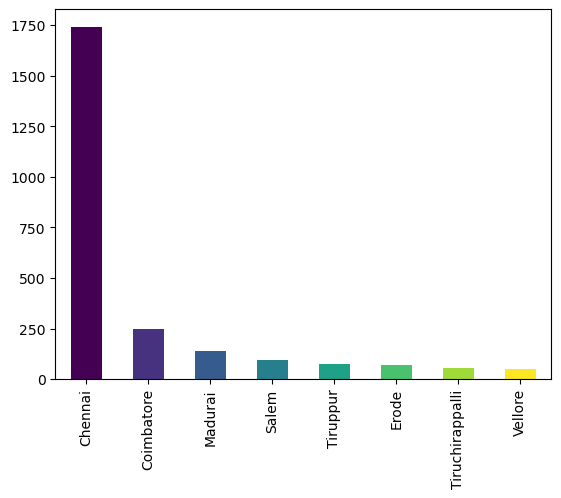

In [31]:
colors = plt.cm.viridis(np.linspace(0, 1, len(frequency_final)))
frequency_final.plot(kind='bar', color=colors)

### Course vs Frequency Plot 

<Axes: >

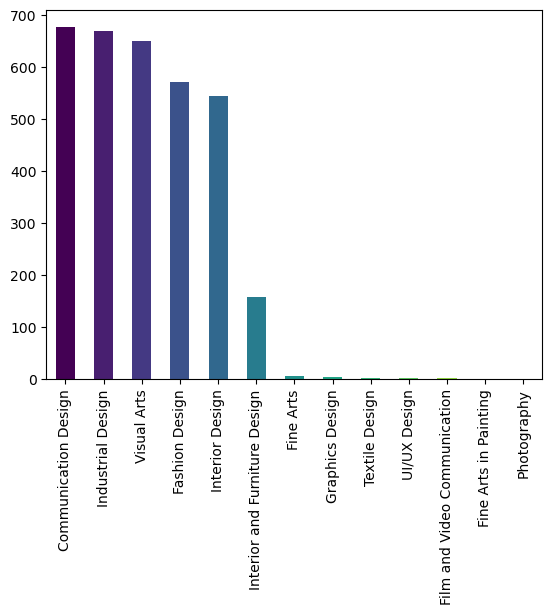

In [44]:
colors = plt.cm.viridis(np.linspace(0, 1, len(final['Course'].value_counts())))
final['Course'].value_counts().plot(kind='bar', color = colors)

In [33]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Submitted Applications,Campaign Number,Source,month,weekday
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia,Untouched,Unverified,Visual Arts,0,90_RV,API,September,Tuesday
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia,Closed,Verified,Interior Design,0,90,API,August,Thursday
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia,Next Year,Verified,Fashion Design,0,90,API,August,Tuesday
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia,Closed,Unverified,Visual Arts,0,90_RV,API,August,Thursday
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia,Closed,Unverified,Interior and Furniture Design,0,90_RV,API,August,Wednesday


<Axes: >

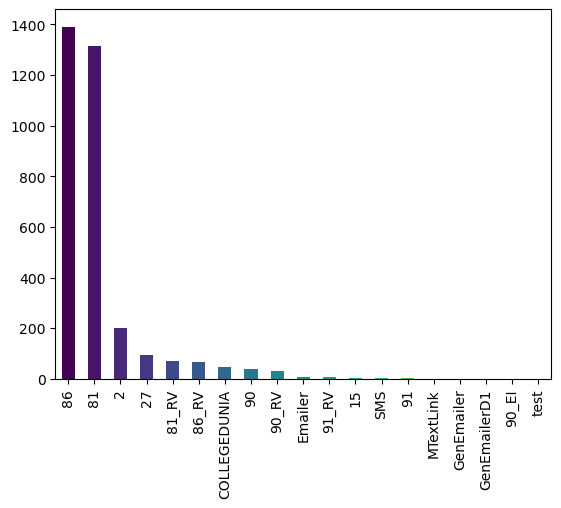

In [47]:
colors = plt.cm.viridis(np.linspace(0, 1, len(final['Campaign Number'].value_counts())))
final['Campaign Number'].value_counts().plot(kind='bar', color = colors)

In [35]:
final['Lead Stage'].value_counts()

Closed        3164
Cold            70
Applied         27
Next Year       20
Warm             5
Interested       2
Untouched        1
Name: Lead Stage, dtype: int64

<Axes: >

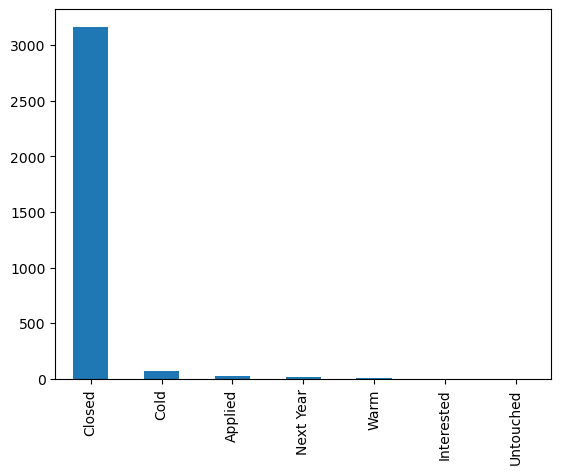

In [36]:
final['Lead Stage'].value_counts().plot(kind='bar')

### Completion Rate

In [37]:
final.head()

,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,Lead Status,Course,Submitted Applications,Campaign Number,Source,month,weekday
0,API,India,Tamil Nadu,Chennai,Primary,2023-09-05,collegedunia,Untouched,Unverified,Visual Arts,0,90_RV,API,September,Tuesday
1,API,India,Tamil Nadu,Chennai,Primary,2023-08-31,Collegedunia,Closed,Verified,Interior Design,0,90,API,August,Thursday
2,API,India,Tamil Nadu,Chennai,Primary,2023-08-22,Collegedunia,Next Year,Verified,Fashion Design,0,90,API,August,Tuesday
3,API,India,Tamil Nadu,Chennai,Primary,2023-08-03,collegedunia,Closed,Unverified,Visual Arts,0,90_RV,API,August,Thursday
4,API,India,Tamil Nadu,Chennai,Primary,2023-08-02,collegedunia,Closed,Unverified,Interior and Furniture Design,0,90_RV,API,August,Wednesday


In [38]:
final['Submitted Applications'] = pd.to_numeric(final['Submitted Applications'])
final.dtypes

Lead Origin                       object
Country                           object
State                             object
City                              object
Instance                          object
Instance Date             datetime64[ns]
Campaign                          object
Lead Stage                        object
Lead Status                       object
Course                            object
Submitted Applications             int64
Campaign Number                   object
Source                            object
month                             object
weekday                           object
dtype: object

In [39]:
pivot_table1 = pd.crosstab(index=final['State'] , columns=final['Submitted Applications'])

In [40]:
pivot_table1

Submitted Applications,0,1
State,,
Andaman and Nicobar,1,0
Delhi,3,0
Gujarat,1,0
Himachal Pradesh,1,0
Karnataka,6,0
Kerala,25,2
Madhya Pradesh,1,0
Maharashtra,4,0
Manipur,1,0


In [41]:
data1 = pd.DataFrame(pivot_table1)

In [42]:
data1

Submitted Applications,0,1
State,,
Andaman and Nicobar,1,0
Delhi,3,0
Gujarat,1,0
Himachal Pradesh,1,0
Karnataka,6,0
Kerala,25,2
Madhya Pradesh,1,0
Maharashtra,4,0
Manipur,1,0


In [45]:
final.dtypes

Lead Origin                       object
Country                           object
State                             object
City                              object
Instance                          object
Instance Date             datetime64[ns]
Campaign                          object
Lead Stage                        object
Lead Status                       object
Course                            object
Submitted Applications             int64
Campaign Number                   object
Source                            object
month                             object
weekday                           object
dtype: object

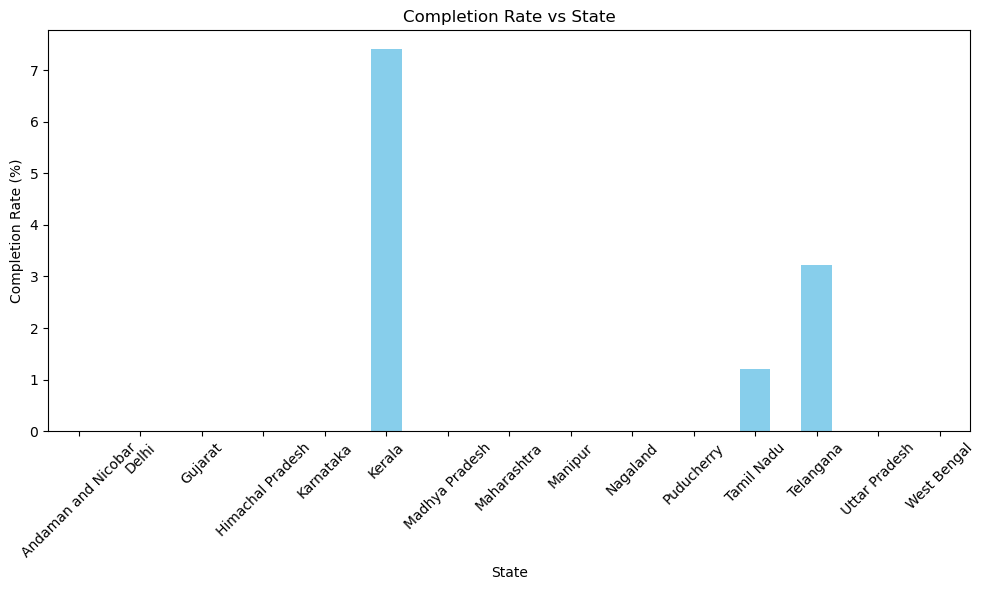

In [46]:
total_leads_by_state = final.groupby('State')['Submitted Applications'].count()
completed_leads_by_state = final[final['Submitted Applications'] == 1].groupby('State')['Submitted Applications'].count()
completion_rate_by_state = (completed_leads_by_state / total_leads_by_state).fillna(0) * 100
plt.figure(figsize=(10, 6))
completion_rate_by_state.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Completion Rate (%)')
plt.title('Completion Rate vs State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
